In [61]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan

#from geo_utils import filter_france_metr

df_car = pd.read_csv('data/caracteristiques.csv',dtype={'dep':'str','com':'str','code_insee':'str'})
df_car = df_car[['Num_Acc', 'agg']]

df_vehicules = pd.read_csv('data/vehicules.csv')

print(df_car.head())


        Num_Acc  agg
0  200500000001    2
1  200500000002    2
2  200500000003    1
3  200500000004    1
4  200500000005    1


In [62]:
print(df_vehicules.head())

        Num_Acc num_veh  senc  catv  occutc  obs  obsm  choc  manv
0  200500000001     A01   0.0     7     0.0  0.0   2.0   1.0   1.0
1  200500000001     B02   0.0     7     0.0  0.0   2.0   8.0  10.0
2  200500000002     A01   0.0     7     0.0  0.0   2.0   7.0  16.0
3  200500000002     B02   0.0     2     0.0  0.0   2.0   1.0   1.0
4  200500000003     A01   0.0     2     0.0  0.0   2.0   1.0   1.0


In [63]:
df_velos = df_vehicules[df_vehicules['catv'].isin([1,50,60,80])]

print(df_velos.head())

          Num_Acc num_veh  senc  catv  occutc  obs  obsm  choc  manv
49   200500000030     B02   0.0     1     0.0  0.0   2.0   8.0  11.0
59   200500000034     B02   0.0     1     0.0  0.0   2.0   1.0   1.0
128  200500000078     B02   0.0     1     0.0  0.0   2.0   1.0   1.0
150  200500000093     B02   0.0     1     0.0  0.0   2.0   3.0  21.0
285  200500000170     A01   0.0     1     0.0  0.0   2.0   4.0   2.0


In [64]:
df_velos = df_car.merge(df_velos,how='inner',on='Num_Acc')

print(df_velos.head())

        Num_Acc  agg num_veh  senc  catv  occutc  obs  obsm  choc  manv
0  200500000030    2     B02   0.0     1     0.0  0.0   2.0   8.0  11.0
1  200500000034    1     B02   0.0     1     0.0  0.0   2.0   1.0   1.0
2  200500000078    1     B02   0.0     1     0.0  0.0   2.0   1.0   1.0
3  200500000093    2     B02   0.0     1     0.0  0.0   2.0   3.0  21.0
4  200500000170    1     A01   0.0     1     0.0  0.0   2.0   4.0   2.0


In [65]:
df_lieux = pd.read_csv('data/lieux.csv',low_memory=False)

print(df_lieux.head())


#print(df_lieux.columns.tolist())

        Num_Acc  catr   voie   v1   v2  circ  nbv    pr    pr1  vosp  prof  \
0  200500000001   3.0  00041  0.0    B   2.0  2.0   1.0  430.0   0.0   1.0   
1  200500000002   2.0  00041  0.0  NaN   0.0  2.0   0.0    0.0   1.0   1.0   
2  200500000003   2.0  00041  0.0  NaN   0.0  0.0   0.0    0.0   1.0   1.0   
3  200500000004   3.0  00916  0.0  NaN   2.0  2.0   0.0    0.0   0.0   1.0   
4  200500000005   3.0  00110  0.0  NaN   2.0  2.0  24.0  630.0   0.0   1.0   

   plan lartpc larrout  surf  infra  situ  
0   1.0      0      63   1.0    0.0   1.0  
1   1.0      0     100   1.0    0.0   5.0  
2   1.0      0       0   2.0    0.0   5.0  
3   1.0      0       0   1.0    0.0   1.0  
4   3.0      0      59   2.0    0.0   3.0  


In [66]:
df_lieux = df_lieux[['Num_Acc', 'catr', 'circ', 'vosp']]

print(df_lieux.head())

        Num_Acc  catr  circ  vosp
0  200500000001   3.0   2.0   0.0
1  200500000002   2.0   0.0   1.0
2  200500000003   2.0   0.0   1.0
3  200500000004   3.0   2.0   0.0
4  200500000005   3.0   2.0   0.0


In [67]:
df_accidents_velo = df_lieux.merge(df_velos,how='inner',on='Num_Acc')

print(df_accidents_velo.head())

        Num_Acc  catr  circ  vosp  agg num_veh  senc  catv  occutc  obs  obsm  \
0  200500000030   3.0   2.0   0.0    2     B02   0.0     1     0.0  0.0   2.0   
1  200500000034   3.0   2.0   0.0    1     B02   0.0     1     0.0  0.0   2.0   
2  200500000078   3.0   2.0   0.0    1     B02   0.0     1     0.0  0.0   2.0   
3  200500000093   3.0   2.0   0.0    2     B02   0.0     1     0.0  0.0   2.0   
4  200500000170   3.0   2.0   0.0    1     A01   0.0     1     0.0  0.0   2.0   

   choc  manv  
0   8.0  11.0  
1   1.0   1.0  
2   1.0   1.0  
3   3.0  21.0  
4   4.0   2.0  


In [68]:
df_accidents_velo.drop_duplicates(subset=['Num_Acc'], keep='last',inplace=True)

In [69]:
df_accidents_velo = df_accidents_velo[['Num_Acc', 'catr', 'circ', 'vosp']] #'agg'

print(df_accidents_velo.head())
print(df_accidents_velo.shape)

        Num_Acc  catr  circ  vosp
0  200500000030   3.0   2.0   0.0
1  200500000034   3.0   2.0   0.0
2  200500000078   3.0   2.0   0.0
3  200500000093   3.0   2.0   0.0
4  200500000170   3.0   2.0   0.0
(85320, 4)


In [70]:
df_accidents_velo = df_accidents_velo[df_accidents_velo['catr'].isin([1, 2, 3, 4, 5, 6, 7]) &
          df_accidents_velo['circ'].isin([1, 2, 3, 4]) &
          df_accidents_velo['vosp'].isin([0, 1, 2, 3])]  #(df_accidents_velo['agg'].isin([1, 2])) &

print(df_accidents_velo.head())
print(df_accidents_velo.shape)

        Num_Acc  catr  circ  vosp
0  200500000030   3.0   2.0   0.0
1  200500000034   3.0   2.0   0.0
2  200500000078   3.0   2.0   0.0
3  200500000093   3.0   2.0   0.0
4  200500000170   3.0   2.0   0.0
(77671, 4)


In [83]:
df_accidents_velo = df_accidents_velo.dropna() 
print(sample['catr'][0])

3.0


In [84]:
dict_value_by_column = {"catr":{1:"autoroute", 2:"route_nationale", 3:"route_departementale", 4:"voie_communales",
                                5:"hors_reseau_public", 6:"stationnement_ouvert_a_circulation",
                                7:"route_metropole_urbaine"},
                        
                        "circ":{1:"sens_unique", 2:"bidirectionnelle",3:"chaussees_separees", 
                                4:"voies_d_affectation_variable"},
                        
                        "vosp":{0:"sans_objet", 1:"piste_cyclable", 2:"bande_cyclable", 3:"voie_reservee"}
                       }

Text(0.5, 1.0, 'Visualisation des données dans un espace 2D')

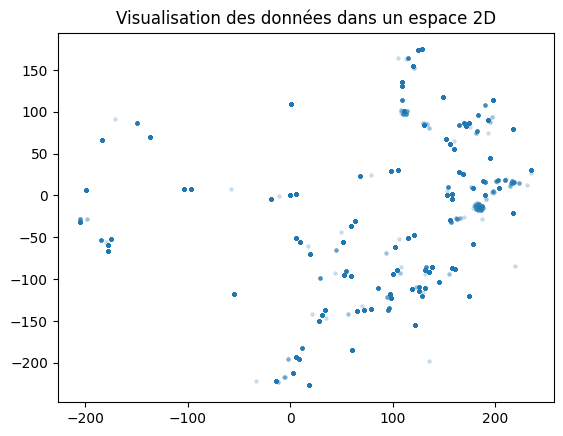

In [76]:
sample = df_accidents_velo# .sample(n=30000)
data_clustering = sample.drop(["Num_Acc"],axis=1)

plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}

tsne = TSNE(n_components=2, random_state=42)
projection = tsne.fit_transform(data_clustering)
plt.scatter(*projection.T, **plot_kwds)
plt.title("Visualisation des données dans un espace 2D")


100%|███████████████████████████████████████████| 30/30 [04:33<00:00,  9.11s/it]


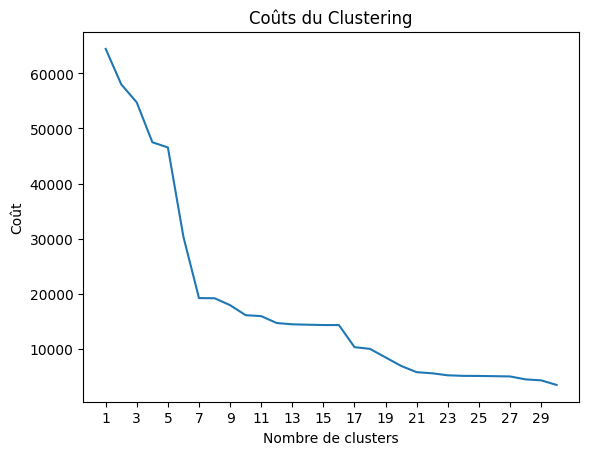

In [77]:
from kmodes.kmodes import KModes
from tqdm import tqdm

clusters=[]
costs=[]

for i in tqdm(range(1,31)):
    km=KModes(n_clusters=i)
    km=km.fit(data_clustering)
    
    clusters.append(i)
    costs.append(km.cost_)

# Plotting graph
plt.figure()
plt.plot(clusters, costs)
plt.title("Coûts du Clustering")
plt.ylabel("Coût")
plt.xlabel("Nombre de clusters")
plt.xticks(np.arange(1,30,2))
plt.show()

In [79]:
km = KModes(n_clusters=11)
clusters = km.fit_predict(data_clustering)
sample["clusters"] = clusters
data_clustering["clusters"] = clusters

In [80]:
import plotly.express as px

data_clustering['projection_2d_x'] = [proj[0] for proj in projection]
data_clustering['projection_2d_y'] = [proj[1] for proj in projection]

cluster_2d = data_clustering
fig = px.scatter(cluster_2d, x="projection_2d_x", y="projection_2d_y", color="clusters", 
                 title="Clusterisation des données en 2D")
fig.show()


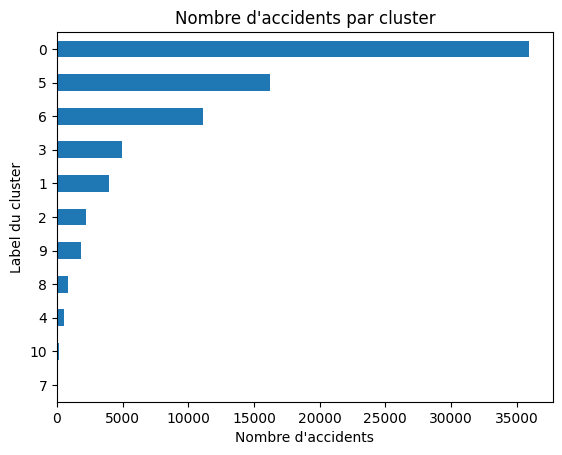

In [82]:
#Accident number 

number_accident = sample['clusters'].value_counts(ascending=True)
number_accident.plot(kind="barh")
plt.title("Nombre d'accidents par cluster")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Label du cluster")
plt.show()

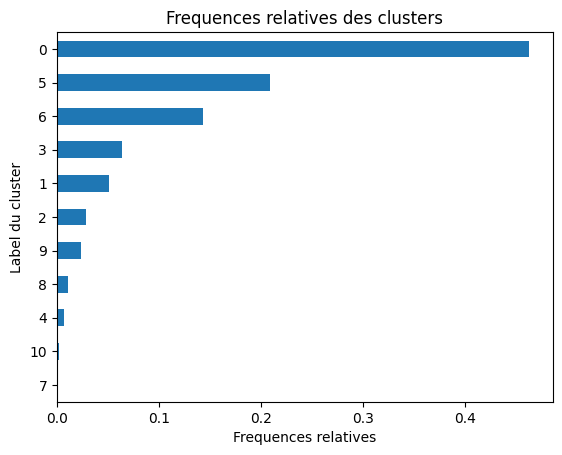

In [41]:
#Accident frequences 

frequencies = sample['clusters'].value_counts(normalize=True, ascending=True)
frequencies.plot(kind="barh")
plt.title("Frequences relatives des clusters")
plt.xlabel("Frequences relatives")
plt.ylabel("Label du cluster")
plt.show()

In [87]:
# Analysing the variables of interest

def analyse_cluster_variables(cluster_selected):
    interest=["catr", "circ", "vosp"]


    df_cluster=sample[sample["clusters"]==cluster_selected]
    #df_noncluster=sample[sample["clusters"]!=cluster_selected]


    for i in interest:
        cats=sample[i].unique()
        cats_names = [dict_value_by_column[i][int(cat)] for cat in cats]
        prop_cluster=[]
        #prop_noncluster=[]

        for x in cats:
            prop_cluster.append(len(df_cluster[df_cluster[i]==x])/len(df_cluster))
            #prop_noncluster.append(len(df_noncluster[df_noncluster[i]==x])/len(df_noncluster))

        # Creating a DataFrame for chart ploting:
        df_plot=pd.DataFrame({"categories":cats_names, "Cluster {}".format(cluster_selected):prop_cluster})#, 
                                 #"Others":prop_noncluster})
        df_plot=df_plot.set_index("categories")

        #Chart
        plt.figure()
        df_plot.plot(kind="barh")
        plt.title("Variable {} du Cluster {}".format(i,cluster_selected))
        plt.xlabel("Frequence relative")
        plt.show()

<Figure size 640x480 with 0 Axes>

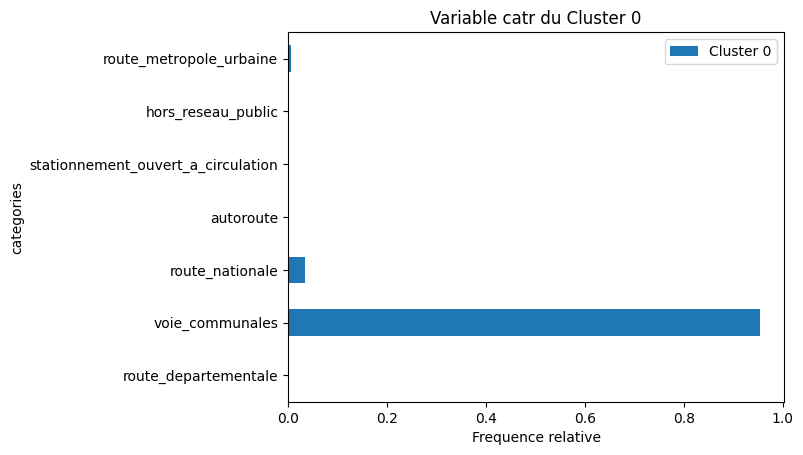

<Figure size 640x480 with 0 Axes>

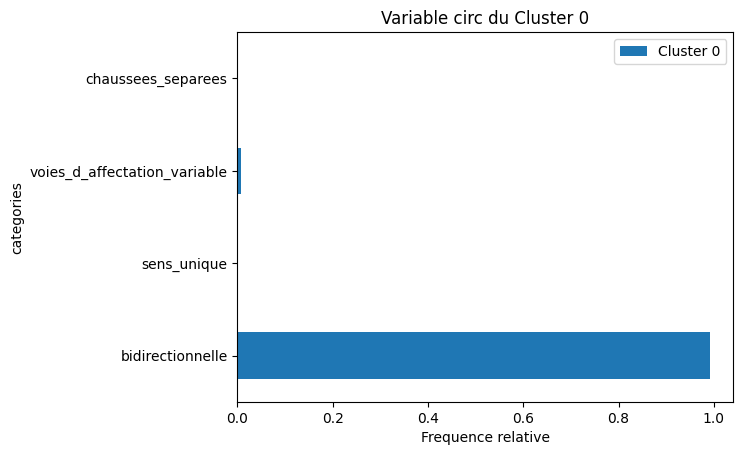

<Figure size 640x480 with 0 Axes>

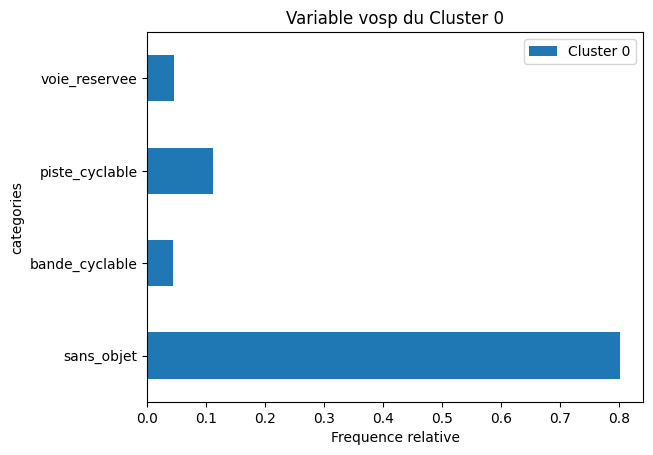

<Figure size 640x480 with 0 Axes>

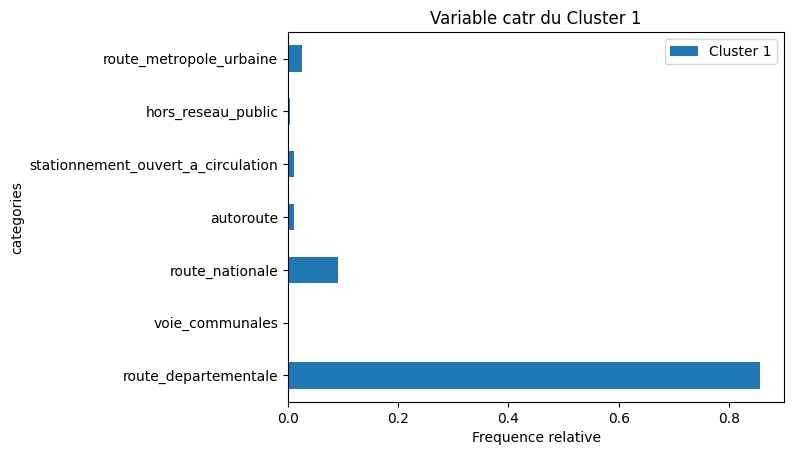

<Figure size 640x480 with 0 Axes>

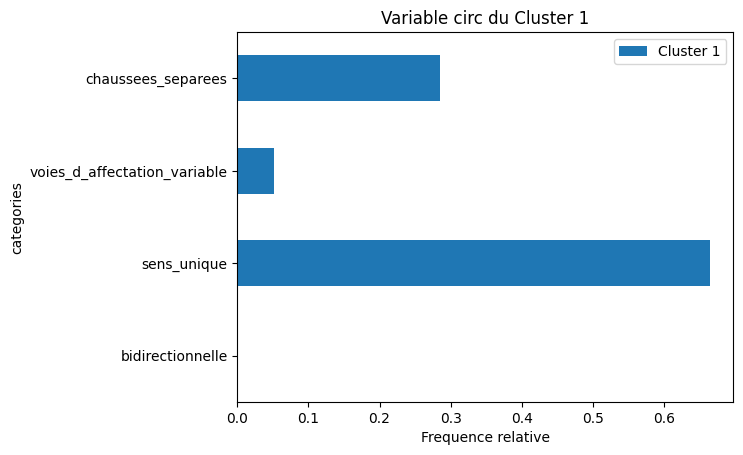

<Figure size 640x480 with 0 Axes>

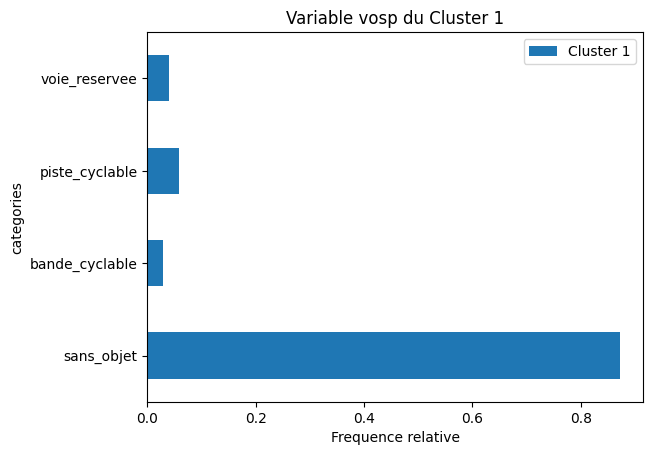

<Figure size 640x480 with 0 Axes>

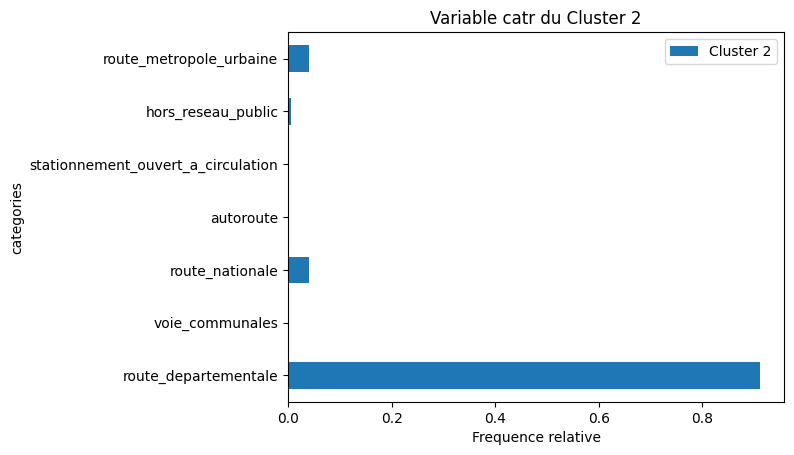

<Figure size 640x480 with 0 Axes>

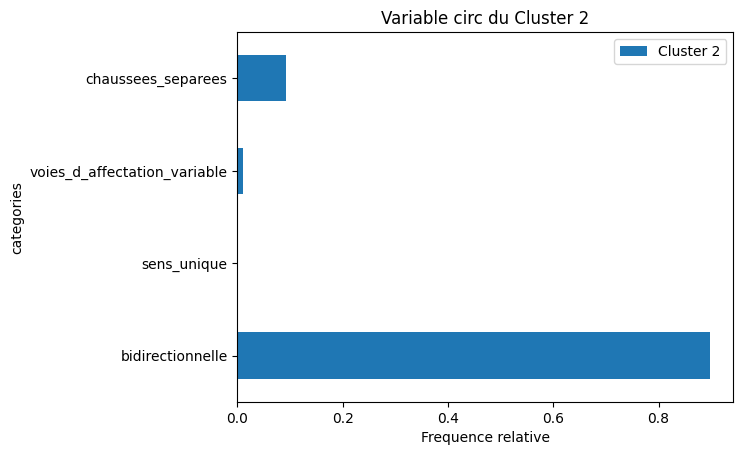

<Figure size 640x480 with 0 Axes>

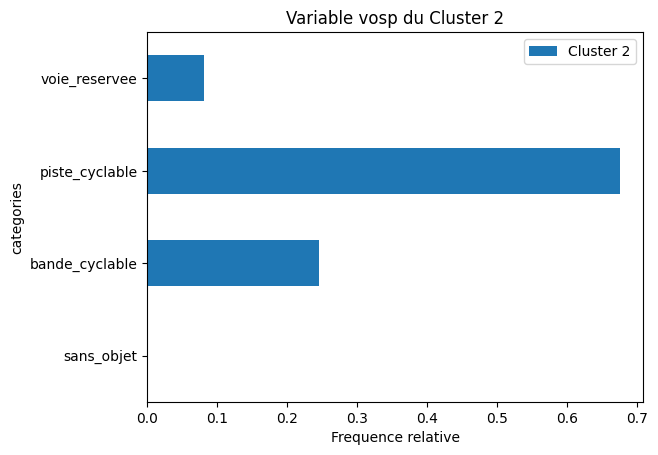

<Figure size 640x480 with 0 Axes>

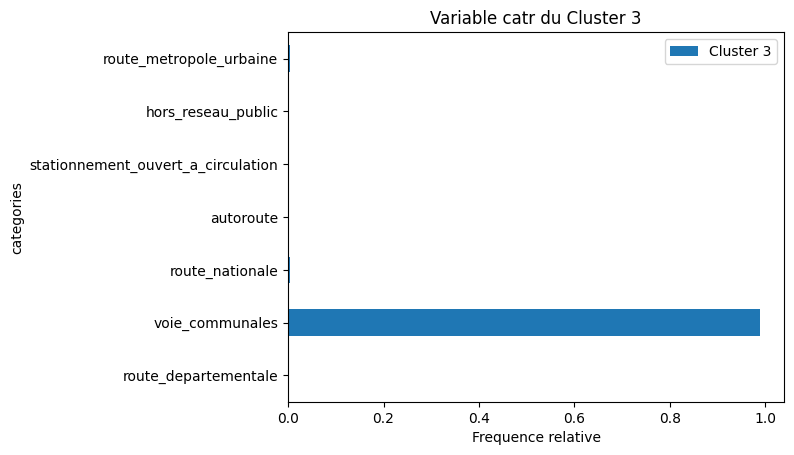

<Figure size 640x480 with 0 Axes>

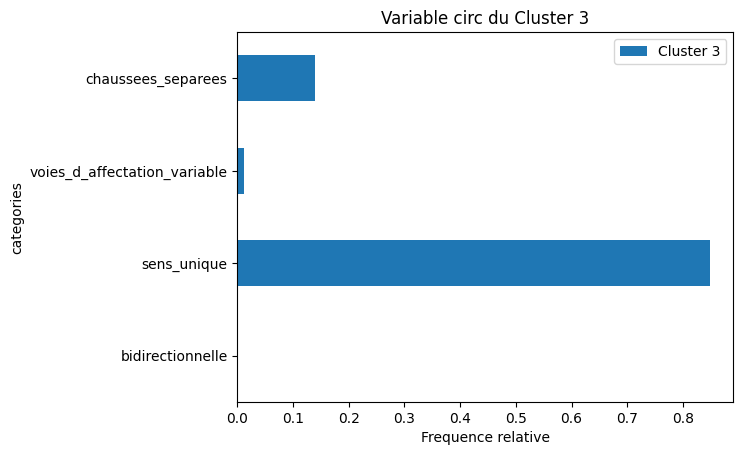

<Figure size 640x480 with 0 Axes>

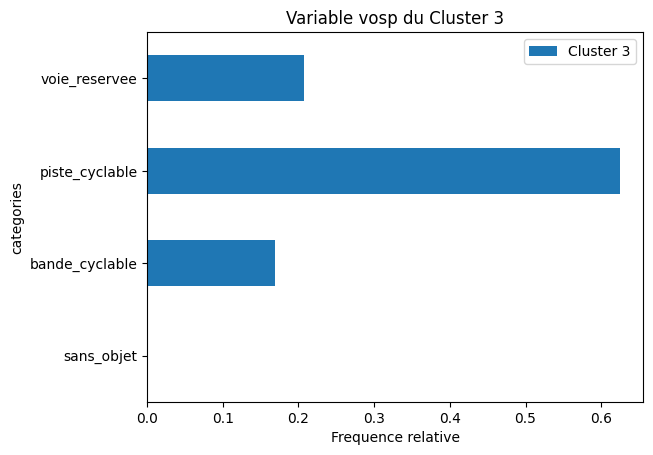

<Figure size 640x480 with 0 Axes>

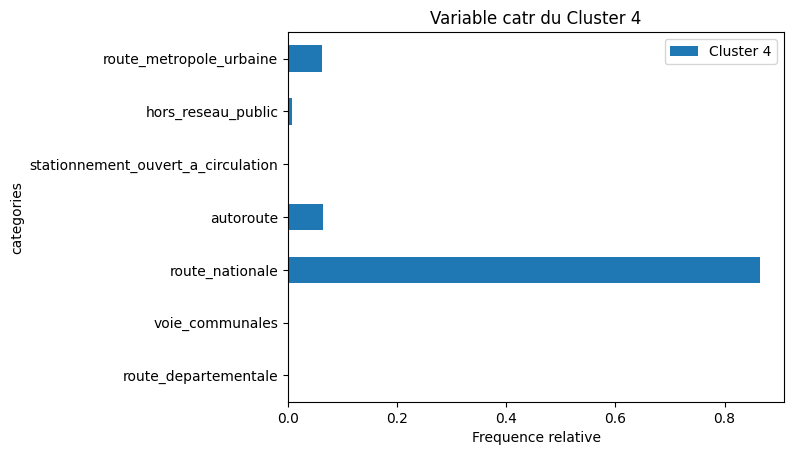

<Figure size 640x480 with 0 Axes>

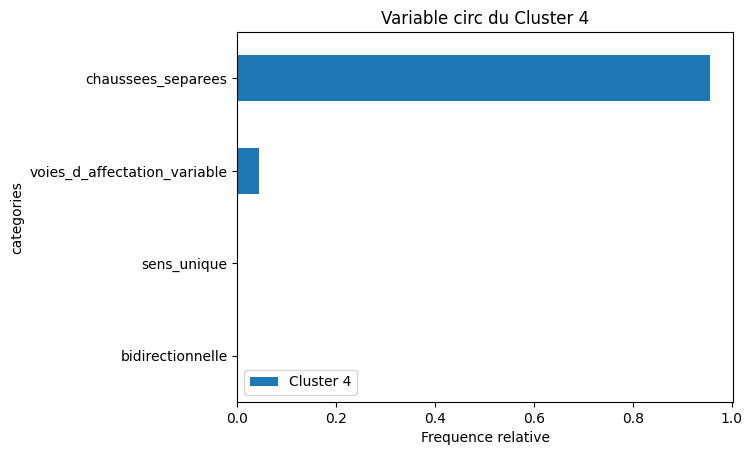

<Figure size 640x480 with 0 Axes>

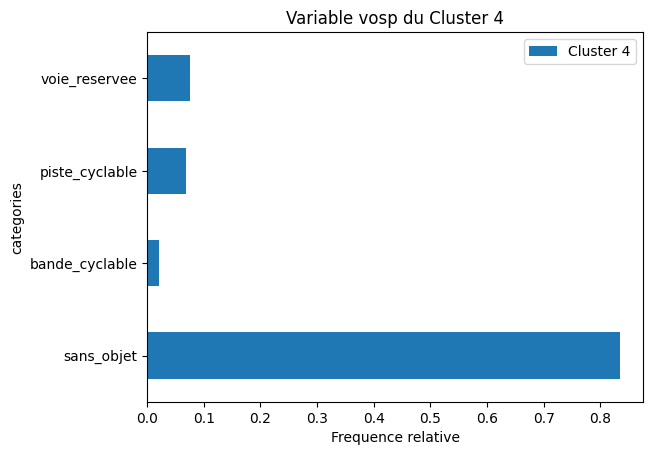

<Figure size 640x480 with 0 Axes>

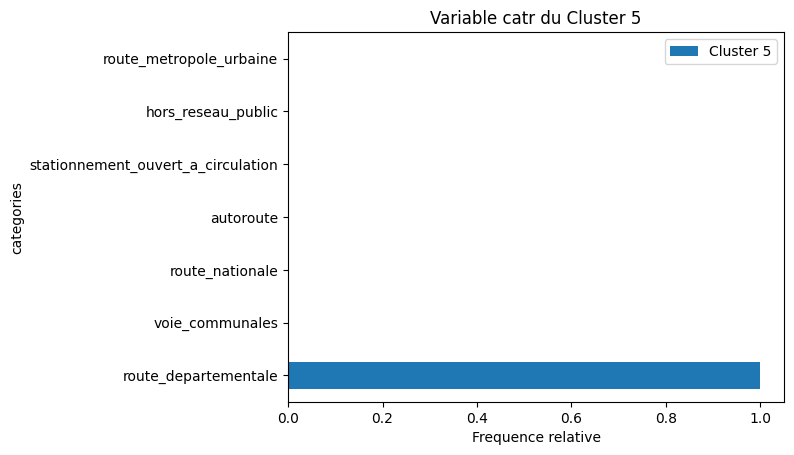

<Figure size 640x480 with 0 Axes>

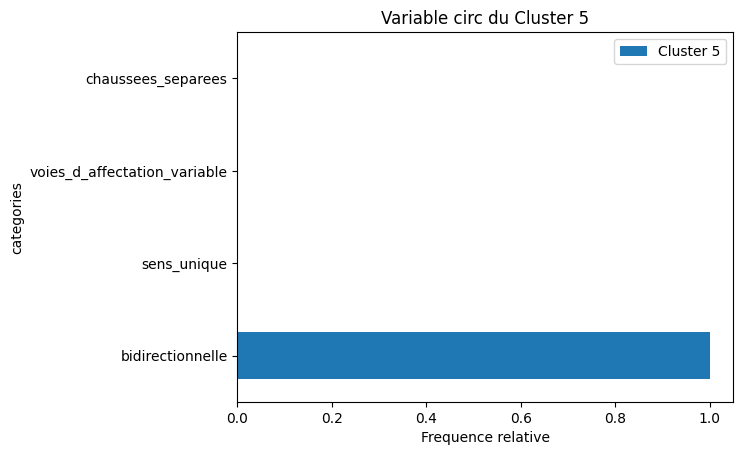

<Figure size 640x480 with 0 Axes>

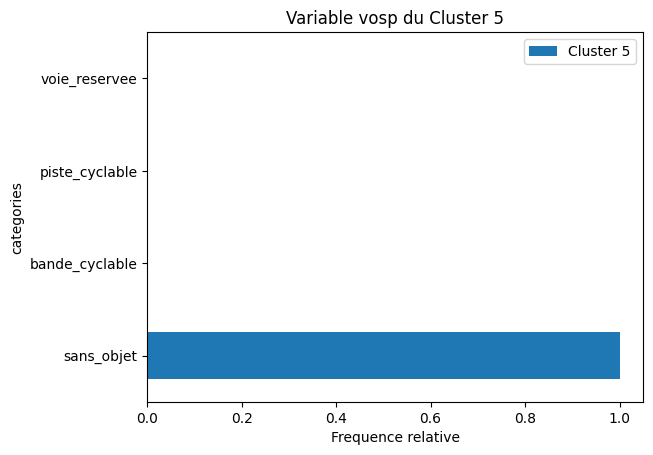

<Figure size 640x480 with 0 Axes>

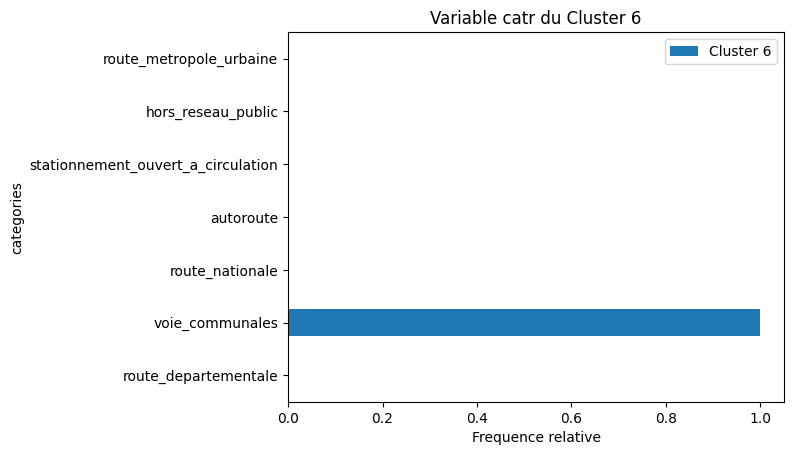

<Figure size 640x480 with 0 Axes>

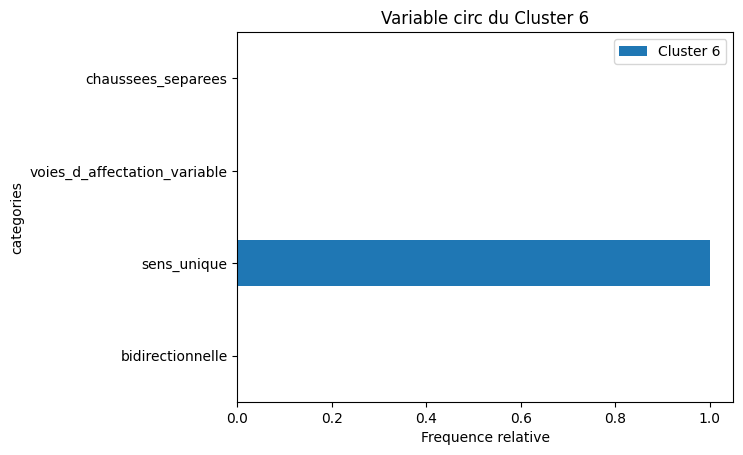

<Figure size 640x480 with 0 Axes>

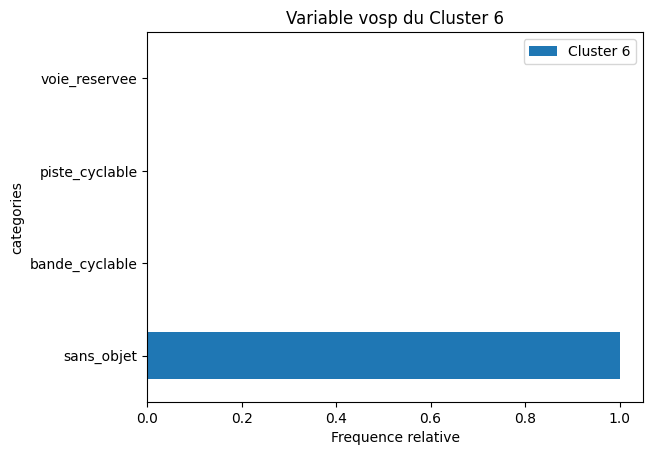

<Figure size 640x480 with 0 Axes>

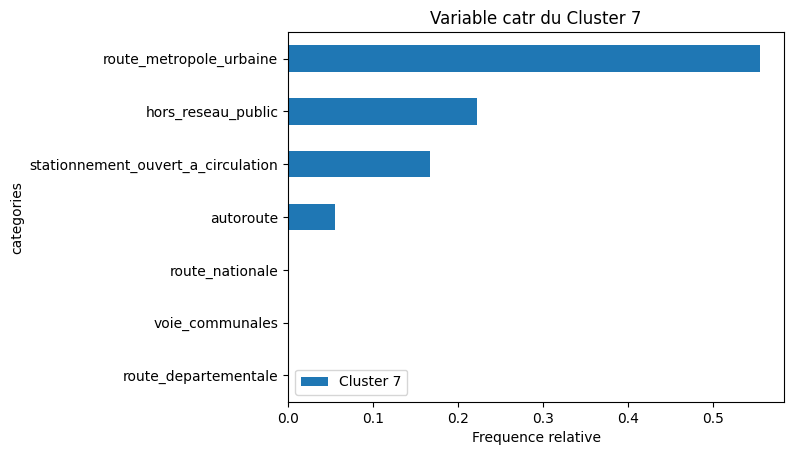

<Figure size 640x480 with 0 Axes>

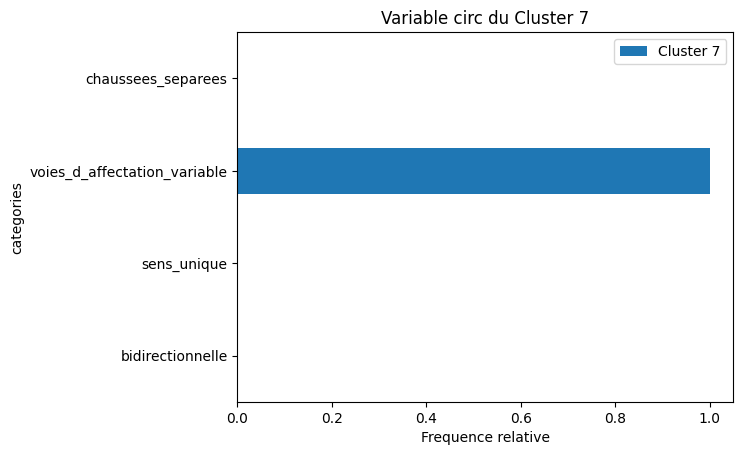

<Figure size 640x480 with 0 Axes>

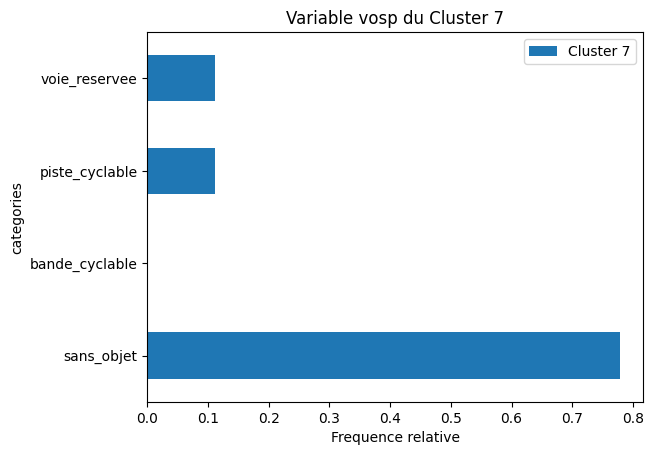

<Figure size 640x480 with 0 Axes>

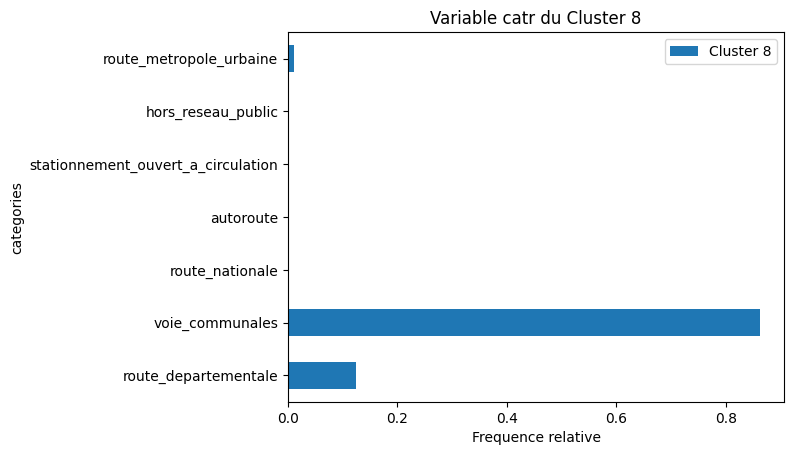

<Figure size 640x480 with 0 Axes>

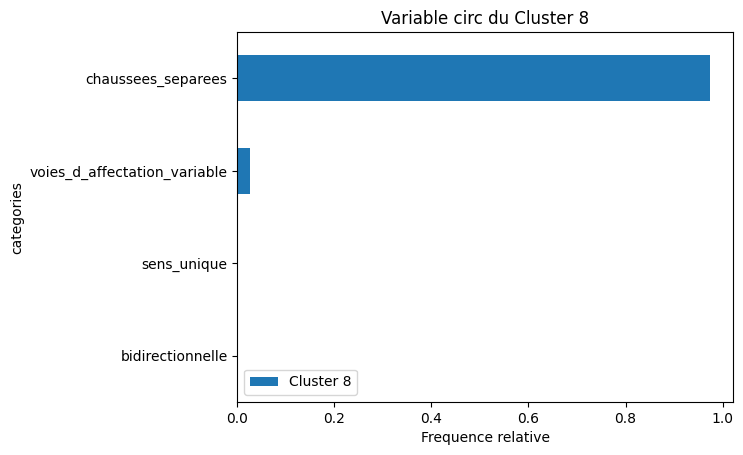

<Figure size 640x480 with 0 Axes>

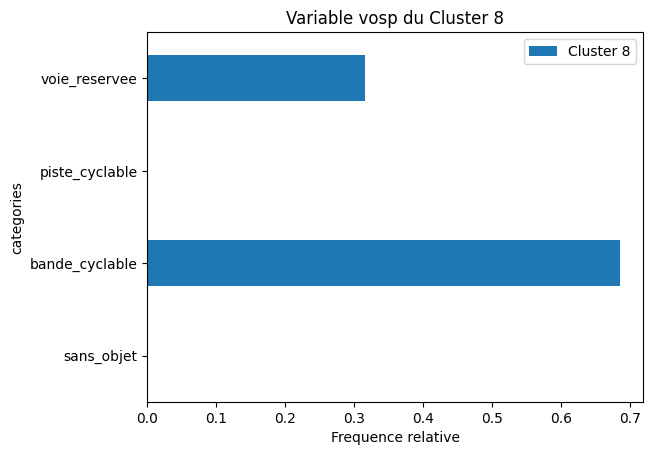

<Figure size 640x480 with 0 Axes>

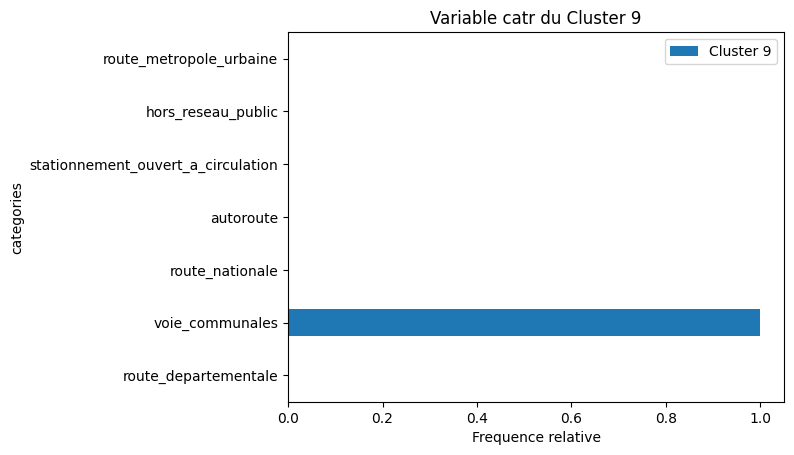

<Figure size 640x480 with 0 Axes>

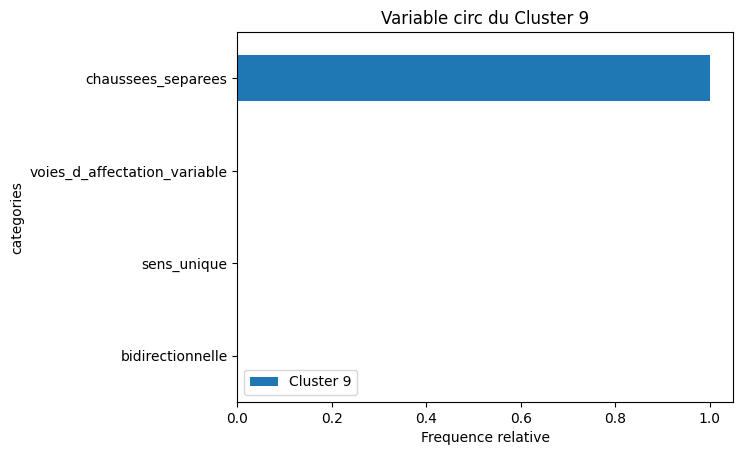

<Figure size 640x480 with 0 Axes>

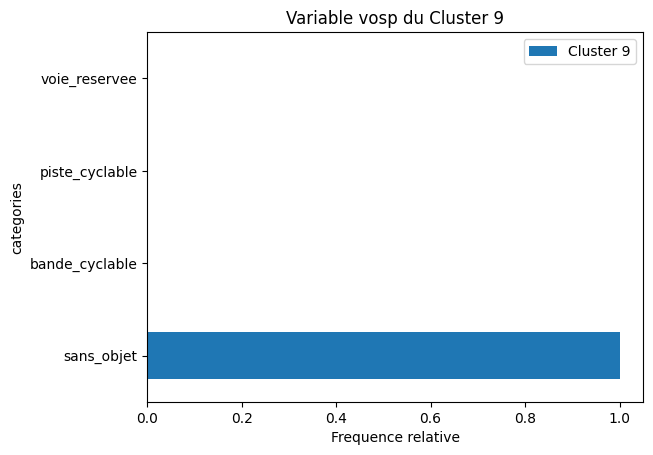

<Figure size 640x480 with 0 Axes>

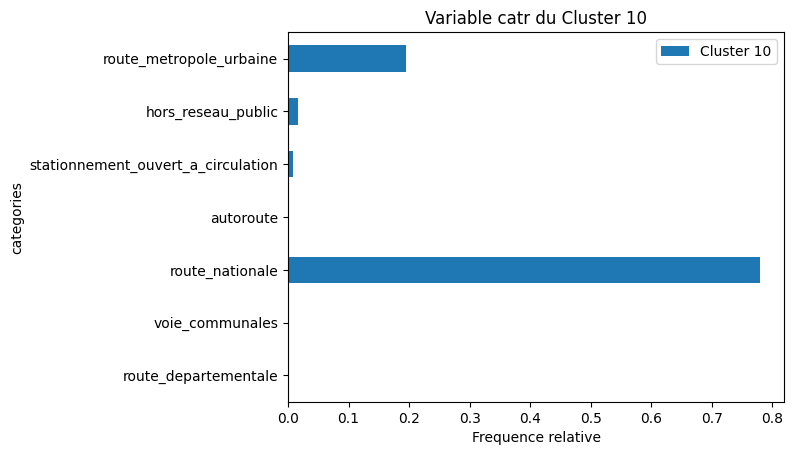

<Figure size 640x480 with 0 Axes>

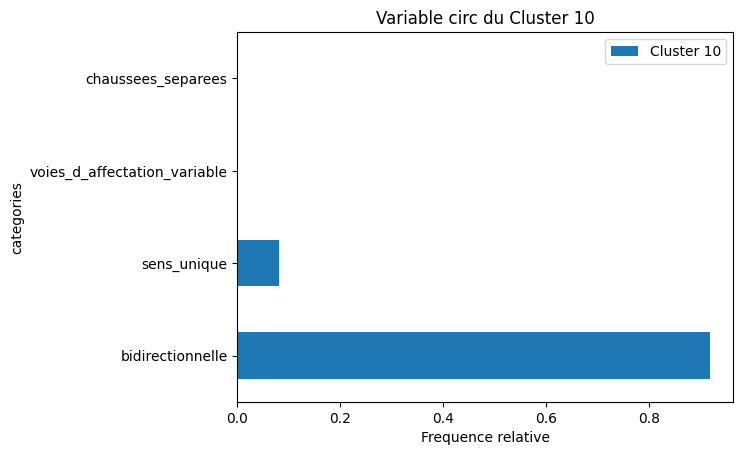

<Figure size 640x480 with 0 Axes>

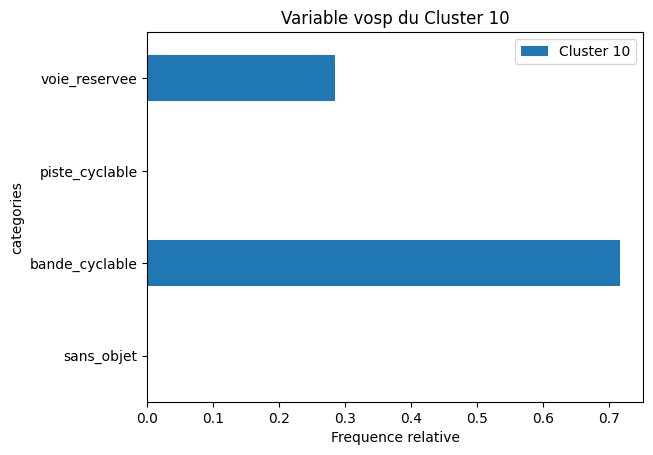

In [88]:
for i in range(11):
    cluster_selected = i
    analyse_cluster_variables(cluster_selected)

<Figure size 640x480 with 0 Axes>

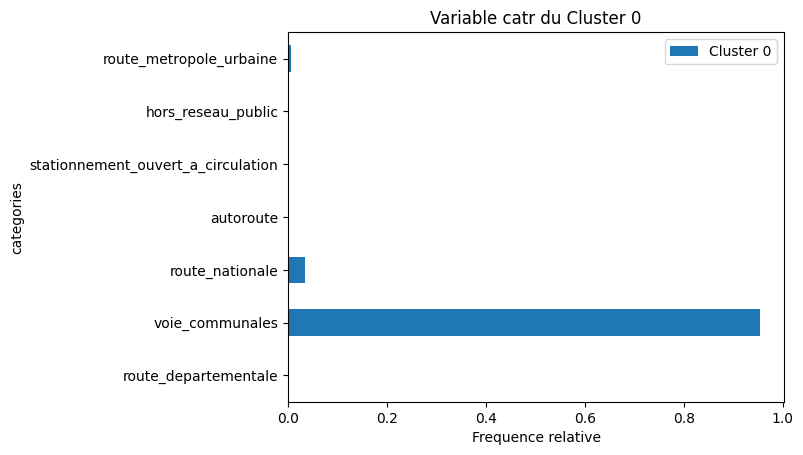

<Figure size 640x480 with 0 Axes>

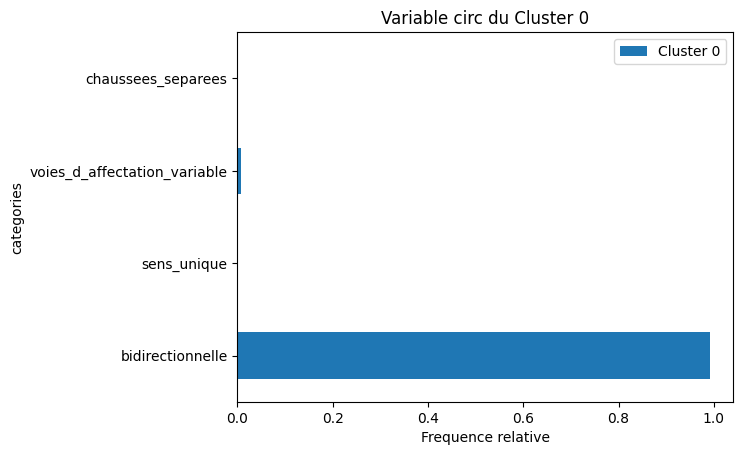

<Figure size 640x480 with 0 Axes>

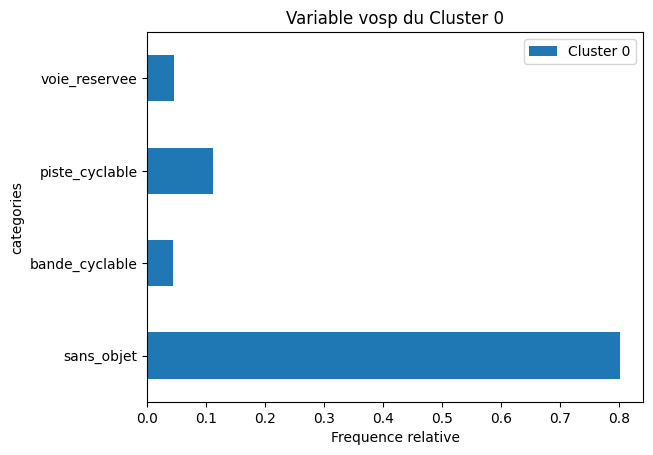

In [89]:
analyse_cluster_variables(0)


# Correspondance entre les clusters et les types de routes

    En regardant les clusters du plus au moins accidentogène, on obtient cette catégorisation:
    - Cluster 0: Voie communale bidirectionnelle sans aménagement
    - Cluster 5: Route départementale bidirectionnelle sans aménagement
    - Cluster 6: Voie communale à sens unique sans aménagement 
    - Cluster 3: Voie communale à sens unique avec aménagement pour 2 roues  
    - Cluster 1: Route départementale à sens unique sans aménagement 
    - Cluster 2: Route départementale bidirectionnelle avec aménagement
    - Cluster 9: Voie communale à chaussées séparées sans aménagment 
    - Cluster 8: Voie communale à chaussées séparées avec aménagment
    - Cluster 4: Route nationale à chaussées séparées sans objet 
    - Cluster 10: Route nationale bidirectionnelle avec aménagement
    - Cluster 7: Route de métropole urbaine à voies d'affectation variable sans aménagement

In [102]:
n_clusters = 11

df_all_vehicules = pd.read_csv('data/vehicules.csv')
df_all_vehicules = df_all_vehicules['Num_Acc']

df_accidentologie = df_lieux.merge(df_all_vehicules,how='inner',on='Num_Acc')

accident_per_cluster = []

for i in range(n_clusters):
    df_accidents_one_cluster = df_accidentologie[df_accidentologie['catr'].isin([km.cluster_centroids_[i][0]]) &
                                                df_accidentologie['circ'].isin([km.cluster_centroids_[i][1]]) &
                                                df_accidentologie['vosp'].isin([km.cluster_centroids_[i][2]])]
    
    accident_per_cluster.append(len(df_accidents_one_cluster))
    


[528439, 33415, 9095, 7846, 48175, 483283, 197324, 81, 3593, 51330, 834]


In [112]:
accidentologie_per_cluster = []
bike_accident_per_cluster_ascending = sample['clusters'].value_counts(ascending=False)
bike_accident_per_cluster = []

for i in range(len(bike_accident_per_cluster_ascending)):
    bike_accident_per_cluster.append(bike_accident_per_cluster_ascending[i])
    
print(bike_accident_per_cluster_ascending)
print(bike_accident_per_cluster)

for i in range(len(bike_accident_per_cluster)):
    accidentologie_per_cluster.append(bike_accident_per_cluster[i]/accident_per_cluster[i])
    
print(accidentologie_per_cluster)

0     35959
5     16210
6     11097
3      4929
1      3980
2      2178
9      1816
8       825
4       536
10      123
7        18
Name: clusters, dtype: int64
[35959, 3980, 2178, 4929, 536, 16210, 11097, 18, 825, 1816, 123]
[0.06804758922032628, 0.11910818494688015, 0.2394722374931281, 0.6282182003568697, 0.011126102750389206, 0.033541423968978835, 0.056237457177028646, 0.2222222222222222, 0.22961313665460617, 0.03537892070913696, 0.1474820143884892]


In [122]:
fig = px.bar(x=[i for i in range(11)], y=accidentologie_per_cluster, labels={'x':'cluster', 'y':'frequence_accidentologie'}, 
             title = "Fréquence d'accidentologie par cluster")
fig.show()